## Installing and Importng necessory packages

In [1]:
!pip install pyspark

In [2]:
!pip install folium

In [2]:
import pandas as pd
from pyspark.sql.functions import col, count, isnull,when,lit,isnan,split
from pyspark.sql import functions as fn
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.types import IntegerType, DoubleType, FloatType, LongType
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StandardScaler
import folium

In [14]:
#! mkdir drive/MyDrive/BDA-Project/ -p

In [3]:
# Creating Spark Session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('BDA-Project').getOrCreate()

# Heart Disease Dataset USA 

In [4]:
# Reading USA Dataset
heart_diesease_df_USA_1=spark.read.option("header", "true").csv('heart_2022_with_nans.csv')

# Basic EDA

In [5]:
# Displaying records
heart_diesease_df_USA_1.show()

+-------+------+-------------+------------------+----------------+--------------------+------------------+----------+------------+--------------+---------+---------+---------+-------------+-------+---------------------+----------------+------------+-----------+-------------------+-----------------------+-----------------------+-----------------+-------------------------+-----------------+--------------------+--------------------+---------+---------------------+---------------+--------------+-----------------+-----+---------------+----------+------------+-------------+--------------------+----------------+--------+
|  State|   Sex|GeneralHealth|PhysicalHealthDays|MentalHealthDays|     LastCheckupTime|PhysicalActivities|SleepHours|RemovedTeeth|HadHeartAttack|HadAngina|HadStroke|HadAsthma|HadSkinCancer|HadCOPD|HadDepressiveDisorder|HadKidneyDisease|HadArthritis|HadDiabetes|DeafOrHardOfHearing|BlindOrVisionDifficulty|DifficultyConcentrating|DifficultyWalking|DifficultyDressingBathing|Diffi

In [6]:
# Using Pandas library for tabular display of data frame
heart_disease_df_pd = heart_diesease_df_USA_1.limit(5).toPandas()
heart_disease_df_pd

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,None,No,...,None,None,None,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,None,No,6.0,None,No,...,1.6,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,None,No,...,1.57,63.5,25.61,No,No,No,No,None,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None,No,...,1.65,63.5,23.3,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [7]:
# Priting Schema to know more about data  
heart_diesease_df_USA_1.printSchema()

root
 |-- State: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- GeneralHealth: string (nullable = true)
 |-- PhysicalHealthDays: string (nullable = true)
 |-- MentalHealthDays: string (nullable = true)
 |-- LastCheckupTime: string (nullable = true)
 |-- PhysicalActivities: string (nullable = true)
 |-- SleepHours: string (nullable = true)
 |-- RemovedTeeth: string (nullable = true)
 |-- HadHeartAttack: string (nullable = true)
 |-- HadAngina: string (nullable = true)
 |-- HadStroke: string (nullable = true)
 |-- HadAsthma: string (nullable = true)
 |-- HadSkinCancer: string (nullable = true)
 |-- HadCOPD: string (nullable = true)
 |-- HadDepressiveDisorder: string (nullable = true)
 |-- HadKidneyDisease: string (nullable = true)
 |-- HadArthritis: string (nullable = true)
 |-- HadDiabetes: string (nullable = true)
 |-- DeafOrHardOfHearing: string (nullable = true)
 |-- BlindOrVisionDifficulty: string (nullable = true)
 |-- DifficultyConcentrating: string (nullable = t

In [8]:
# decribing data in terms of count, uniqueness, top, and frequency
heart_diesease_df_USA_1.toPandas().describe()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,445132,445132,443934,434205,436065,436824,444039,439679,433772,442067,...,416480,403054,396326,398558,379005,398011,368092,362616,394509,394368
unique,54,2,5,31,31,4,2,24,4,2,...,109,599,3985,2,2,2,2,4,2,3
top,Washington,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.68,90.72,26.63,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,26152,235893,148444,267819,265229,350944,337559,132927,233455,416959,...,36782,21311,4262,210891,249919,209256,215604,121493,377324,270055


In [9]:
# Showng the shape of the DataFrame (number of rows and columns)
print(f"Shape: ({heart_diesease_df_USA_1.count()}, {len(heart_diesease_df_USA_1.columns)})")

Shape: (445132, 40)


In [10]:
# Importing necessary PySpark SQL functions
from pyspark.sql import functions as F

# Creating a group based on 'target' column and count the occurrences of each unique value
heart_diesease_df_USA_1.groupBy(F.col('HadHeartAttack')).agg(F.count('HadHeartAttack')).show()

+--------------+---------------------+
|HadHeartAttack|count(HadHeartAttack)|
+--------------+---------------------+
|          NULL|                    0|
|            No|               416959|
|           Yes|                25108|
+--------------+---------------------+



## Checking Null values

In [11]:
# Importing necessary PySpark SQL functions
from pyspark.sql.functions import col

# Counting Iteratively nulls in each column and print
for c in heart_diesease_df_USA_1.columns:
    null_count = heart_diesease_df_USA_1.filter(col(c).isNull()).count()
    print(f"Nulls in {c}: {null_count}")

Nulls in State: 0
Nulls in Sex: 0
Nulls in GeneralHealth: 1198
Nulls in PhysicalHealthDays: 10927
Nulls in MentalHealthDays: 9067
Nulls in LastCheckupTime: 8308
Nulls in PhysicalActivities: 1093
Nulls in SleepHours: 5453
Nulls in RemovedTeeth: 11360
Nulls in HadHeartAttack: 3065
Nulls in HadAngina: 4405
Nulls in HadStroke: 1557
Nulls in HadAsthma: 1773
Nulls in HadSkinCancer: 3143
Nulls in HadCOPD: 2219
Nulls in HadDepressiveDisorder: 2812
Nulls in HadKidneyDisease: 1926
Nulls in HadArthritis: 2633
Nulls in HadDiabetes: 1087
Nulls in DeafOrHardOfHearing: 20647
Nulls in BlindOrVisionDifficulty: 21564
Nulls in DifficultyConcentrating: 24240
Nulls in DifficultyWalking: 24012
Nulls in DifficultyDressingBathing: 23915
Nulls in DifficultyErrands: 25656
Nulls in SmokerStatus: 35462
Nulls in ECigaretteUsage: 35660
Nulls in ChestScan: 56046
Nulls in RaceEthnicityCategory: 14057
Nulls in AgeCategory: 9079
Nulls in HeightInMeters: 28652
Nulls in WeightInKilograms: 42078
Nulls in BMI: 48806
Nulls 

# Dealing with null records - 
## 1. Removing columns with a lot of null values
## 2. Removing null value records
## 3. Using Imputation to replace null values [no need to use it here]

In [12]:
from pyspark.sql.functions import col

# Calculating the threshold for dropping columns
threshold = heart_diesease_df_USA_1.count() * 0.5

# Dropping columns with more than 50% missing values
cols_to_drop = [c for c in heart_diesease_df_USA_1.columns if heart_diesease_df_USA_1.filter(col(c).isNull()).count() > threshold]
heart_diesease_df_USA_1 = heart_diesease_df_USA_1.drop(*cols_to_drop)

In [13]:
# Dropping rows with any null values
heart_diesease_df_USA_1 = heart_diesease_df_USA_1.na.drop()

In [14]:
# Counting Iteratively nulls in each column and print
for c in heart_diesease_df_USA_1.columns:
    null_count = heart_diesease_df_USA_1.filter(col(c).isNull()).count()
    print(f"Nulls in {c}: {null_count}")

Nulls in State: 0
Nulls in Sex: 0
Nulls in GeneralHealth: 0
Nulls in PhysicalHealthDays: 0
Nulls in MentalHealthDays: 0
Nulls in LastCheckupTime: 0
Nulls in PhysicalActivities: 0
Nulls in SleepHours: 0
Nulls in RemovedTeeth: 0
Nulls in HadHeartAttack: 0
Nulls in HadAngina: 0
Nulls in HadStroke: 0
Nulls in HadAsthma: 0
Nulls in HadSkinCancer: 0
Nulls in HadCOPD: 0
Nulls in HadDepressiveDisorder: 0
Nulls in HadKidneyDisease: 0
Nulls in HadArthritis: 0
Nulls in HadDiabetes: 0
Nulls in DeafOrHardOfHearing: 0
Nulls in BlindOrVisionDifficulty: 0
Nulls in DifficultyConcentrating: 0
Nulls in DifficultyWalking: 0
Nulls in DifficultyDressingBathing: 0
Nulls in DifficultyErrands: 0
Nulls in SmokerStatus: 0
Nulls in ECigaretteUsage: 0
Nulls in ChestScan: 0
Nulls in RaceEthnicityCategory: 0
Nulls in AgeCategory: 0
Nulls in HeightInMeters: 0
Nulls in WeightInKilograms: 0
Nulls in BMI: 0
Nulls in AlcoholDrinkers: 0
Nulls in HIVTesting: 0
Nulls in FluVaxLast12: 0
Nulls in PneumoVaxEver: 0
Nulls in Tet

## Removing Duplicates

In [15]:
integrated_deduped = heart_diesease_df_USA_1.drop_duplicates()
print('There are', integrated_deduped.count(), 'unduplicated records in the integrated data set.')

There are 246013 unduplicated records in the integrated data set.


## Converting String Data into Numeric

In [16]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType

# Define the indexer for the 'Sex' column
indexer_sex = StringIndexer(inputCol="Sex", outputCol="SexIndex")

# Define the indexer for the 'GeneralHealth' column
indexer_general_health = StringIndexer(inputCol="GeneralHealth", outputCol="GeneralHealthIndex")

# Build the pipeline
pipeline = Pipeline(stages=[indexer_sex, indexer_general_health])

# Fit the pipeline to the data
model = pipeline.fit(heart_diesease_df_USA_1)

# Transform the data
heart_diesease_df_USA_1_transformed = model.transform(heart_diesease_df_USA_1)

# Cast the index columns to integer type
heart_diesease_df_USA_1_transformed = heart_diesease_df_USA_1_transformed \
    .withColumn("SexIndex", col("SexIndex").cast(IntegerType())) \
    .withColumn("GeneralHealthIndex", col("GeneralHealthIndex").cast(IntegerType()))

# Show some of the transformed data
heart_diesease_df_USA_1_transformed.select("Sex", "SexIndex", "GeneralHealth", "GeneralHealthIndex").show()

+------+--------+-------------+------------------+
|   Sex|SexIndex|GeneralHealth|GeneralHealthIndex|
+------+--------+-------------+------------------+
|Female|       0|    Very good|                 0|
|  Male|       1|    Very good|                 0|
|  Male|       1|    Very good|                 0|
|Female|       0|         Fair|                 3|
|Female|       0|         Good|                 1|
|  Male|       1|         Good|                 1|
|Female|       0|         Good|                 1|
|  Male|       1|         Fair|                 3|
|  Male|       1|         Good|                 1|
|Female|       0|    Very good|                 0|
|  Male|       1|    Very good|                 0|
|Female|       0|         Good|                 1|
|  Male|       1|         Good|                 1|
|Female|       0|         Good|                 1|
|  Male|       1|         Fair|                 3|
|Female|       0|         Good|                 1|
|Female|       0|         Good|

In [17]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType

# List of columns to be indexed - add or remove columns based on your dataset's requirements
columns_to_index = [
    "LastCheckupTime", "PhysicalActivities", "RemovedTeeth", "HadHeartAttack", 
    "HadAngina", "HadStroke", "HadAsthma", "HadSkinCancer", "HadCOPD", 
    "HadDepressiveDisorder", "HadKidneyDisease", "HadArthritis", "HadDiabetes", 
    "DeafOrHardOfHearing", "BlindOrVisionDifficulty", "DifficultyConcentrating", 
    "DifficultyWalking", "DifficultyDressingBathing", "DifficultyErrands", 
    "SmokerStatus", "ECigaretteUsage", "ChestScan", "RaceEthnicityCategory", 
    "AgeCategory", "HIVTesting", "FluVaxLast12", "PneumoVaxEver", "TetanusLast10Tdap", 
    "HighRiskLastYear", "CovidPos"
]

# Creating StringIndexer objects for each column in the list, setting handleInvalid to 'keep'
indexers = [StringIndexer(inputCol=column, outputCol=f"{column}Index", handleInvalid="keep") for column in columns_to_index]

# Build the pipeline with all indexers
pipeline = Pipeline(stages=indexers)

# Fit the pipeline to the data
model = pipeline.fit(heart_diesease_df_USA_1)

# Transform the data
transformed_data = model.transform(heart_diesease_df_USA_1)

# Cast index columns to integer type and show some transformed data
for column in columns_to_index:
    transformed_data = transformed_data.withColumn(f"{column}Index", col(f"{column}Index").cast(IntegerType()))

# Show some of the transformed data
transformed_data.select([col for col in columns_to_index] + [f"{col}Index" for col in columns_to_index]).show()

transformed_data.show()

+--------------------+------------------+--------------------+--------------+---------+---------+---------+-------------+-------+---------------------+----------------+------------+-----------+-------------------+-----------------------+-----------------------+-----------------+-------------------------+-----------------+--------------------+--------------------+---------+---------------------+---------------+----------+------------+-------------+--------------------+----------------+--------+--------------------+-----------------------+-----------------+-------------------+--------------+--------------+--------------+------------------+------------+--------------------------+---------------------+-----------------+----------------+------------------------+----------------------------+----------------------------+----------------------+------------------------------+----------------------+-----------------+--------------------+--------------+--------------------------+----------------+

In [18]:
# Show the transformed data in a more readable format
# Here, we limit to displaying 10 rows, and we set truncate to False to show full content of each cell
transformed_data.show(10, truncate=False, vertical=True)

-RECORD 0-----------------------------------------------------------------------------------
 State                          | Alabama                                                   
 Sex                            | Female                                                    
 GeneralHealth                  | Very good                                                 
 PhysicalHealthDays             | 4.0                                                       
 MentalHealthDays               | 0.0                                                       
 LastCheckupTime                | Within past year (anytime less than 12 months ago)        
 PhysicalActivities             | Yes                                                       
 SleepHours                     | 9.0                                                       
 RemovedTeeth                   | None of them                                              
 HadHeartAttack                 | No                                  

In [19]:
from pyspark.sql.types import IntegerType, DoubleType, FloatType

# Get the list of numerical columns
numeric_cols = [field.name for field in transformed_data.schema.fields if isinstance(field.dataType, (IntegerType, DoubleType, FloatType))]

# Select only the numerical columns from the DataFrame
numerical_data_df = transformed_data.select(numeric_cols)

# Show the filtered DataFrame to verify it contains only numerical columns
numerical_data_df.show()

+--------------------+-----------------------+-----------------+-------------------+--------------+--------------+--------------+------------------+------------+--------------------------+---------------------+-----------------+----------------+------------------------+----------------------------+----------------------------+----------------------+------------------------------+----------------------+-----------------+--------------------+--------------+--------------------------+----------------+---------------+-----------------+------------------+----------------------+---------------------+-------------+
|LastCheckupTimeIndex|PhysicalActivitiesIndex|RemovedTeethIndex|HadHeartAttackIndex|HadAnginaIndex|HadStrokeIndex|HadAsthmaIndex|HadSkinCancerIndex|HadCOPDIndex|HadDepressiveDisorderIndex|HadKidneyDiseaseIndex|HadArthritisIndex|HadDiabetesIndex|DeafOrHardOfHearingIndex|BlindOrVisionDifficultyIndex|DifficultyConcentratingIndex|DifficultyWalkingIndex|DifficultyDressingBathingIndex|Di

In [20]:
numerical_data_df.show(10, truncate=False, vertical=True)

-RECORD 0-----------------------------
 LastCheckupTimeIndex           | 0   
 PhysicalActivitiesIndex        | 0   
 RemovedTeethIndex              | 0   
 HadHeartAttackIndex            | 0   
 HadAnginaIndex                 | 0   
 HadStrokeIndex                 | 0   
 HadAsthmaIndex                 | 0   
 HadSkinCancerIndex             | 0   
 HadCOPDIndex                   | 0   
 HadDepressiveDisorderIndex     | 0   
 HadKidneyDiseaseIndex          | 0   
 HadArthritisIndex              | 1   
 HadDiabetesIndex               | 0   
 DeafOrHardOfHearingIndex       | 0   
 BlindOrVisionDifficultyIndex   | 0   
 DifficultyConcentratingIndex   | 0   
 DifficultyWalkingIndex         | 0   
 DifficultyDressingBathingIndex | 0   
 DifficultyErrandsIndex         | 0   
 SmokerStatusIndex              | 1   
 ECigaretteUsageIndex           | 0   
 ChestScanIndex                 | 0   
 RaceEthnicityCategoryIndex     | 0   
 AgeCategoryIndex               | 0   
 HIVTestingIndex         

## Checking coorelation with output variable

In [22]:
from pyspark.sql.types import IntegerType, DoubleType, FloatType

# Ensure 'HadHeartAttackIndex' is included in the numerical columns list
numeric_cols = [field.name for field in transformed_data.schema.fields if isinstance(field.dataType, (IntegerType, DoubleType, FloatType))]

# Check if 'HadHeartAttackIndex' is part of the numerical columns, if not, add it
if 'HadHeartAttackIndex' not in numeric_cols:
    print("HadHeartAttackIndex is not detected as a numerical column. Please check the data type.")
else:
    # Select only the numerical columns from the DataFrame
    numerical_data_df = transformed_data.select(numeric_cols)

    # Calculate correlation with 'HadHeartAttackIndex' for each numerical column
    correlations = {}
    for column in numeric_cols:
        if column != 'HadHeartAttackIndex':  # Avoid computing the correlation of the target with itself
            correlation = numerical_data_df.stat.corr('HadHeartAttackIndex', column)
            correlations[column] = correlation

    # Print the correlations
    for column, corr_value in correlations.items():
        print(f"Correlation between {column} and HadHeartAttackIndex: {corr_value}")

Correlation between LastCheckupTimeIndex and HadHeartAttackIndex: -0.06575261880596596
Correlation between PhysicalActivitiesIndex and HadHeartAttackIndex: 0.08318746614313138
Correlation between RemovedTeethIndex and HadHeartAttackIndex: 0.16590388972216938
Correlation between HadAnginaIndex and HadHeartAttackIndex: 0.44590330637925135
Correlation between HadStrokeIndex and HadHeartAttackIndex: 0.17713679562239257
Correlation between HadAsthmaIndex and HadHeartAttackIndex: 0.023756127185638826
Correlation between HadSkinCancerIndex and HadHeartAttackIndex: 0.04940804181247898
Correlation between HadCOPDIndex and HadHeartAttackIndex: 0.1332226100716643
Correlation between HadDepressiveDisorderIndex and HadHeartAttackIndex: 0.023705814834909498
Correlation between HadKidneyDiseaseIndex and HadHeartAttackIndex: 0.10935516937070312
Correlation between HadArthritisIndex and HadHeartAttackIndex: 0.11777270078272294
Correlation between HadDiabetesIndex and HadHeartAttackIndex: 0.100725887847

In [56]:
# # List of columns to drop based on low correlation with the target variable
# columns_to_drop = [
#     "LastCheckupTimeIndex", "ECigaretteUsageIndex", "RaceEthnicityCategoryIndex",
#     "HIVTestingIndex", "FluVaxLast12Index", "TetanusLast10TdapIndex",
#     "HighRiskLastYearIndex", "CovidPosIndex"
# ]

# # Dropping the columns from the DataFrame
# reduced_data_df = transformed_data.drop(*columns_to_drop)

# # Show the DataFrame to verify columns are dropped
# reduced_data_df.show()

In [57]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Assuming 'numeric_cols' contains the list of numerical columns you want to include in the correlation matrix
# numeric_cols = [field.name for field in reduced_data_df.schema.fields if isinstance(field.dataType, (IntegerType, DoubleType, FloatType))]

# # Create an empty Pandas DataFrame
# corr_matrix = pd.DataFrame(index=numeric_cols, columns=numeric_cols)

# # Compute correlation for each pair of numerical columns and fill in the Pandas DataFrame
# for i in numeric_cols:
#     for j in numeric_cols:
#         corr_matrix.loc[i, j] = reduced_data_df.stat.corr(i, j)

# # Convert the elements from string to float (because Spark correlation returns results as string)
# corr_matrix = corr_matrix.astype(float)

# # Plotting the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# #-------
# from pyspark.sql.functions import col
# import pandas as pd

# # Assuming 'top_10_columns' contains the names of the top 10 correlated columns
# # Adding 'HadHeartAttackIndex' to the list to compute its correlation with other top columns
# top_10_columns_with_target = top_10_columns + ['HadHeartAttackIndex']

# # Creating a matrix to store the correlations
# correlation_data = []
# for col1 in top_10_columns_with_target:
#     row = []
#     for col2 in top_10_columns_with_target:
#         row.append(transformed_data.stat.corr(col1, col2))
#     correlation_data.append(row)

# # Convert the correlation data into a Pandas DataFrame for visualization
# corr_matrix = pd.DataFrame(correlation_data, columns=top_10_columns_with_target, index=top_10_columns_with_target)

# # Show the correlation matrix to check the data
# print(corr_matrix)

In [58]:
# from pyspark.sql.functions import col

# # Dictionary of correlation values from your previous output
# correlations = {
#     "LastCheckupTimeIndex": -0.035276439605616126,
#     "PhysicalActivitiesIndex": 0.09360827875131113,
#     "RemovedTeethIndex": 0.16153566289514443,
#     "HadAnginaIndex": 0.4183779580704891,
#     "HadStrokeIndex": 0.21888664389453355,
#     "HadAsthmaIndex": 0.05327010045607946,
#     "HadSkinCancerIndex": 0.07818370441436027,
#     "HadCOPDIndex": 0.15992045181495132,
#     "HadDepressiveDisorderIndex": 0.05334711410219978,
#     "HadKidneyDiseaseIndex": 0.13334421688293233,
#     "HadArthritisIndex": 0.12452206125105694,
#     "HadDiabetesIndex": 0.11698941894281124,
#     "DeafOrHardOfHearingIndex": 0.06992027375716205,
#     "BlindOrVisionDifficultyIndex": 0.049650460463144995,
#     "DifficultyConcentratingIndex": 0.050051936368817634,
#     "DifficultyWalkingIndex": 0.1131098665127263,
#     "DifficultyDressingBathingIndex": 0.0462417979417623,
#     "DifficultyErrandsIndex": 0.05933731600912185,
#     "SmokerStatusIndex": 0.0554163434355001,
#     "ECigaretteUsageIndex": 0.005787444431261734,
#     "ChestScanIndex": 0.11113254809432457,
#     "RaceEthnicityCategoryIndex": 0.0144136443403006,
#     "AgeCategoryIndex": -0.09648012085210916,
#     "HIVTestingIndex": 0.008638261705899434,
#     "FluVaxLast12Index": -0.014269967568609675,
#     "PneumoVaxEverIndex": 0.051769593253067576,
#     "TetanusLast10TdapIndex": -0.007512994828920548,
#     "HighRiskLastYearIndex": 0.00674651228920293,
#     "CovidPosIndex": -0.004574081155453741
# }

# # Sort the dictionary by absolute values of correlation and keep the top 10
# top_10_columns = sorted(correlations, key=lambda x: abs(correlations[x]), reverse=True)[:1]

# # Selecting only the top 10 correlated columns in the DataFrame
# reduced_data_df = transformed_data.select(top_10_columns)

# # Show the resulting DataFrame with top 10 correlated columns
# reduced_data_df.show()


## Checking Outliers

In [ ]:
from pyspark.sql.functions import col, lit
from pyspark.sql.types import IntegerType, DoubleType, FloatType
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Outlier Detection").getOrCreate()

outliers_present = False  # Flag to check if any outliers are found

for cols in numeric_cols:
    try:
        print(f"Processing column: {cols}")
        # Compute the first and third quartiles and then the IQR
        Q1, Q3 = numerical_data_df.approxQuantile(cols, [0.15, 0.85], 0)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtering data outside the interquartile range
        outliers = numerical_data_df.filter(
            (col(cols) < lit(lower_bound)) | (col(cols) > lit(upper_bound))
        )

        # Get count of outliers
        outliers_count = outliers.count()

        if outliers_count > 0:
            print(f"{cols}: {outliers_count} outliers found")
            outliers_present = True
        else:
            print(f"{cols}: No Outliers found")
    except Exception as e:
        print(f"Error processing column {cols}: {str(e)}")

if not outliers_present:
    print("No outliers found in any column")

# Clear the cache if no longer needed
numerical_data_df.unpersist()

print("Completed processing all numeric columns.")


In [ ]:
numerical_data_df.head()

In [94]:
# Assuming 'top_10_columns' contains the names of the top 10 correlated columns
# Compute the correlation matrix for these columns
from pyspark.sql.functions import col
import pandas as pd

# Creating a matrix to store the correlations
correlation_data = []
for col1 in top_10_columns:
    row = []
    for col2 in top_10_columns:
        row.append(transformed_data.stat.corr(col1, col2))
    correlation_data.append(row)

# Convert the correlation data into a Pandas DataFrame for visualization
corr_matrix = pd.DataFrame(correlation_data, columns=top_10_columns, index=top_10_columns)

# Show the correlation matrix to check the data
print(corr_matrix)


                         HadAnginaIndex  HadStrokeIndex  RemovedTeethIndex  \
HadAnginaIndex                 1.000000        0.193251           0.159880   
HadStrokeIndex                 0.193251        1.000000           0.133659   
RemovedTeethIndex              0.159880        0.133659           1.000000   
HadCOPDIndex                   0.181498        0.142277           0.219627   
HadKidneyDiseaseIndex          0.166330        0.128927           0.112156   
HadArthritisIndex              0.157011        0.122471           0.229138   
HadDiabetesIndex               0.126001        0.106520           0.139114   
DifficultyWalkingIndex         0.118631        0.116404           0.174674   
ChestScanIndex                 0.120065        0.096148           0.153503   
AgeCategoryIndex              -0.113346       -0.081189          -0.249219   
PhysicalActivitiesIndex        0.090397        0.087493           0.194163   

                         HadCOPDIndex  HadKidneyDiseaseIndex  \

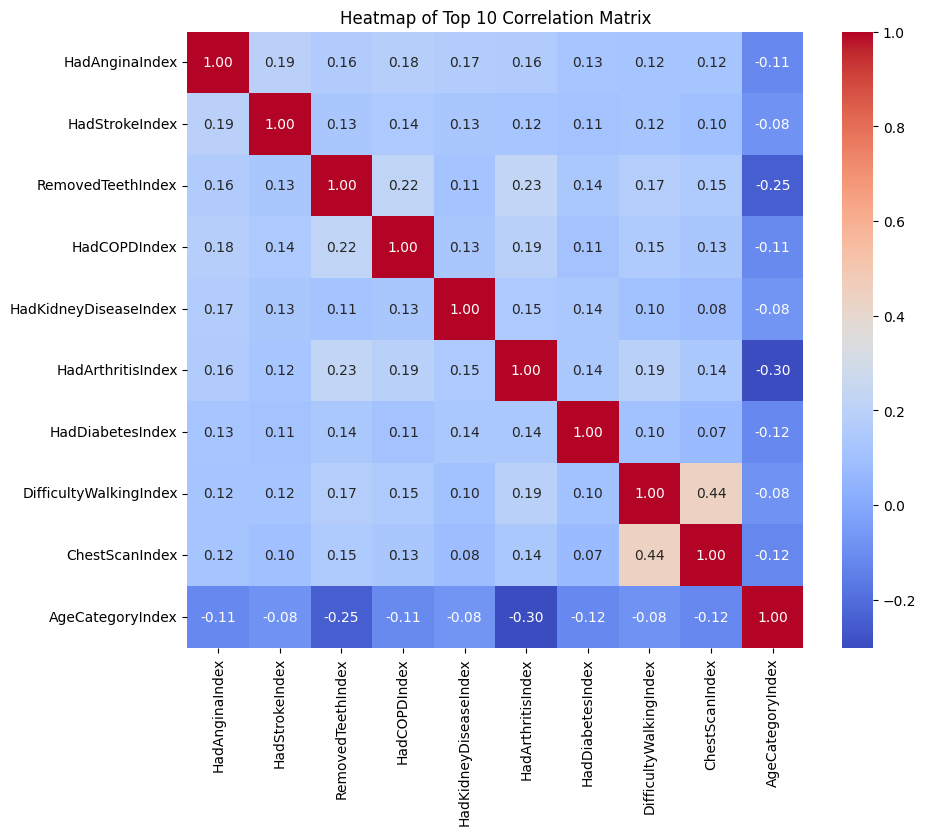

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap of Top 10 Correlation Matrix')
plt.show()

## Feature Wise EDA

### Age

In [113]:
from pyspark.sql.functions import col

# Count the frequency of each unique value in the 'HadAnginaIndex' column
frequency_df = transformed_data.groupBy('HadAnginaIndex').count().orderBy('HadAnginaIndex')

# Show the frequency DataFrame to verify
frequency_df.show()


+--------------+------+
|HadAnginaIndex| count|
+--------------+------+
|             0|231069|
|             1| 14953|
+--------------+------+



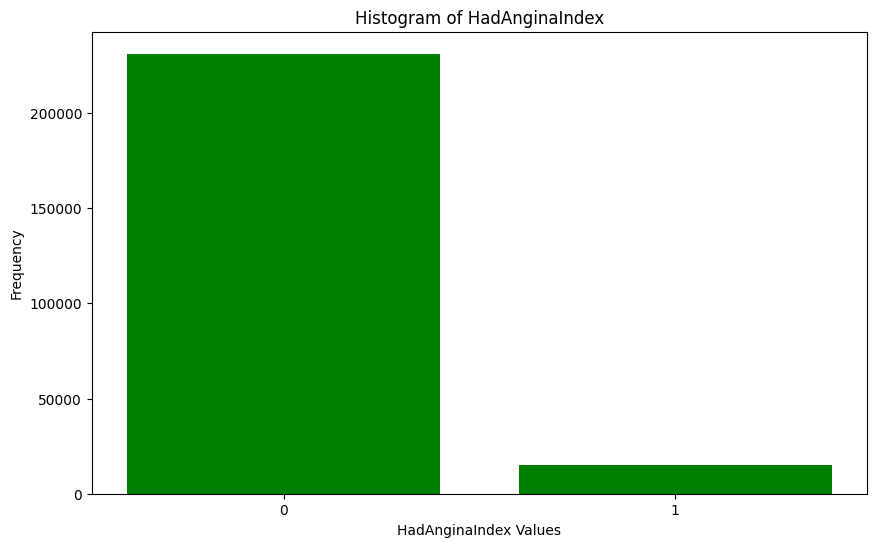

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the frequency DataFrame to Pandas
frequency_pd = frequency_df.toPandas()

# Plotting the histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(frequency_pd['HadAnginaIndex'], frequency_pd['count'], color='green')
plt.xlabel('HadAnginaIndex Values')
plt.ylabel('Frequency')
plt.title('Histogram of HadAnginaIndex')
plt.xticks(frequency_pd['HadAnginaIndex'])  # Ensure all ticks are labeled
plt.show()

In [115]:
from pyspark.sql.functions import col

# Count the frequency of each unique value in the 'HadStrokeIndex' column
frequency_df = transformed_data.groupBy('HadStrokeIndex').count().orderBy('HadStrokeIndex')

# Show the frequency DataFrame to verify
frequency_df.show()

+--------------+------+
|HadStrokeIndex| count|
+--------------+------+
|             0|235910|
|             1| 10112|
+--------------+------+



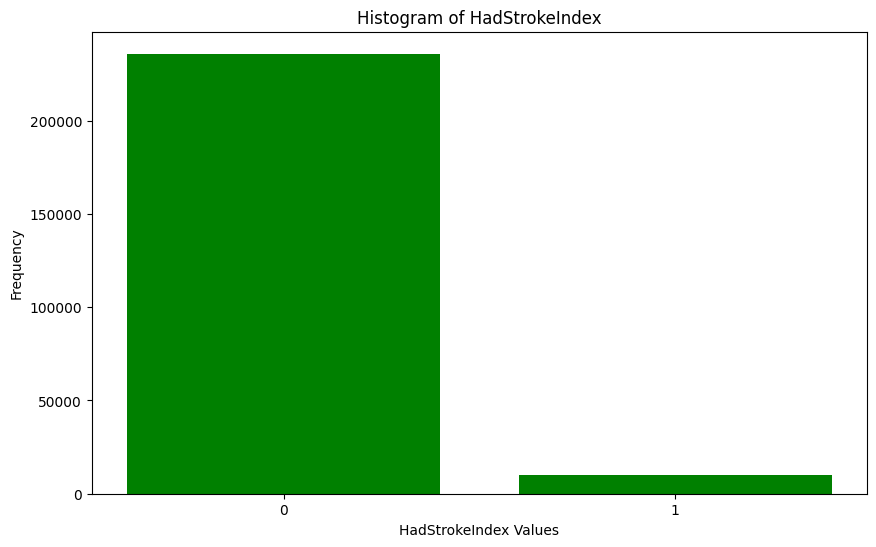

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the frequency DataFrame to Pandas
frequency_pd = frequency_df.toPandas()

# Plotting the histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(frequency_pd['HadStrokeIndex'], frequency_pd['count'], color='green')
plt.xlabel('HadStrokeIndex Values')
plt.ylabel('Frequency')
plt.title('Histogram of HadStrokeIndex')
plt.xticks(frequency_pd['HadStrokeIndex'])  # Ensure all ticks are labeled with their respective index values
plt.show()

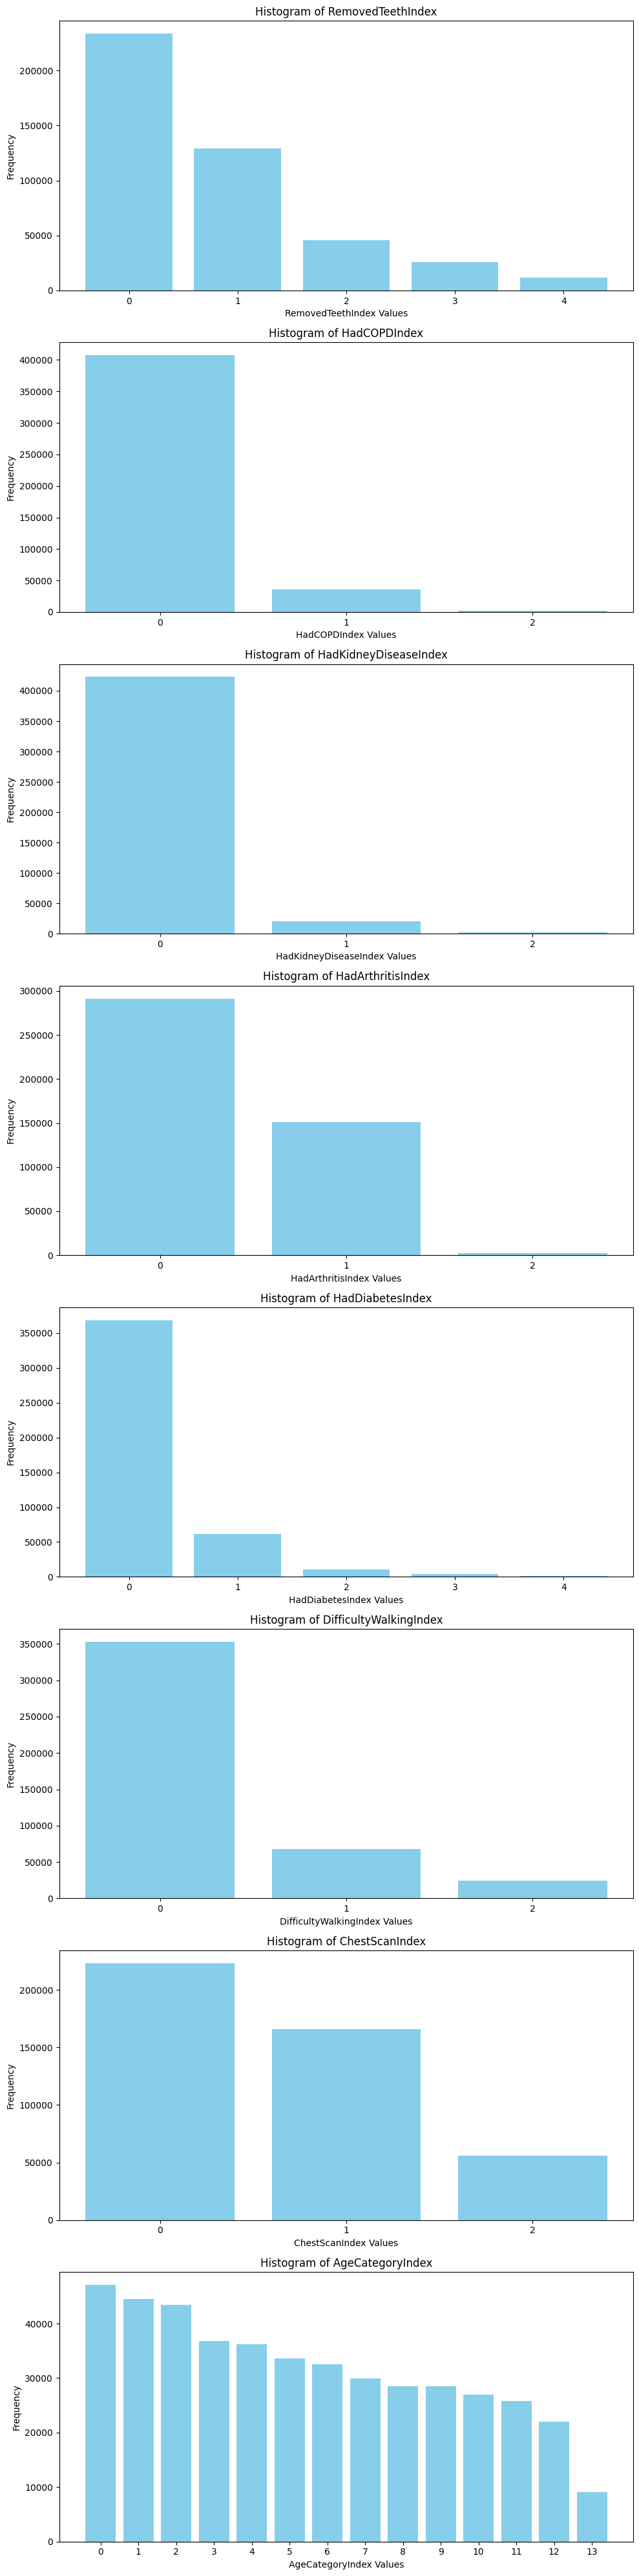

In [72]:
from pyspark.sql.functions import col
import pandas as pd
import matplotlib.pyplot as plt

# List of columns to visualize
columns_to_visualize = [
    "RemovedTeethIndex",
    "HadCOPDIndex",
    "HadKidneyDiseaseIndex",
    "HadArthritisIndex",
    "HadDiabetesIndex",
    "DifficultyWalkingIndex",
    "ChestScanIndex",
    "AgeCategoryIndex"
]

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=len(columns_to_visualize), ncols=1, figsize=(10, 40))

# Iterate over the columns and create a subplot for each histogram
for index, column in enumerate(columns_to_visualize):
    # Count the frequency of each unique value in the current column
    frequency_df = transformed_data.groupBy(column).count().orderBy(column)
    
    # Convert the frequency DataFrame to Pandas
    frequency_pd = frequency_df.toPandas()
    
    # Plotting the histogram using matplotlib on the respective subplot axis
    axes[index].bar(frequency_pd[column], frequency_pd['count'], color='skyblue')
    axes[index].set_title(f'Histogram of {column}')
    axes[index].set_xlabel(f'{column} Values')
    axes[index].set_ylabel('Frequency')
    axes[index].set_xticks(frequency_pd[column])  # Ensure all ticks are labeled with their respective index values

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [76]:
pip install numpy pandas scikit-learn matplotlib seaborn


   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 653.6 kB/s eta 0:00:17
   - -------------------------------------- 0.3/10.6 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/10.6 MB 7.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/10.6 MB 12.8 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/10.6 MB 15.4 MB/s eta 0:00:01
   -------------------- ------------------- 5.5/10.6 MB 19.5 MB/s eta 0:00:01
   -------------------------- ------------- 7.0/10.6 MB 22.2 MB/s eta 0:00:01
   --------------------------------- ------ 8.8/10.6 MB 24.4 MB/s eta 0:00:01
   ------------------------------------ --- 9.8/10.6 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 28.5 MB/s eta 0:00:00


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [22]:
numerical_data_df.head(1)

[Row(LastCheckupTimeIndex=0, PhysicalActivitiesIndex=0, RemovedTeethIndex=0, HadHeartAttackIndex=0, HadAnginaIndex=0, HadStrokeIndex=0, HadAsthmaIndex=0, HadSkinCancerIndex=0, HadCOPDIndex=0, HadDepressiveDisorderIndex=0, HadKidneyDiseaseIndex=0, HadArthritisIndex=1, HadDiabetesIndex=0, DeafOrHardOfHearingIndex=0, BlindOrVisionDifficultyIndex=0, DifficultyConcentratingIndex=0, DifficultyWalkingIndex=0, DifficultyDressingBathingIndex=0, DifficultyErrandsIndex=0, SmokerStatusIndex=1, ECigaretteUsageIndex=0, ChestScanIndex=0, RaceEthnicityCategoryIndex=0, AgeCategoryIndex=0, HIVTestingIndex=0, FluVaxLast12Index=0, PneumoVaxEverIndex=1, TetanusLast10TdapIndex=2, HighRiskLastYearIndex=0, CovidPosIndex=0)]

In [23]:
# Check the distinct values in the target column
distinct_values = numerical_data_df.select('HadHeartAttackIndex').distinct().collect()
print("Distinct values in 'HadHeartAttackIndex':", [row['HadHeartAttackIndex'] for row in distinct_values])

Distinct values in 'HadHeartAttackIndex': [1, 0]


In [24]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder.appName("HeartDiseaseAnalysis").getOrCreate()

# Ensure your target variable is properly coded as 0 or 1, and update the feature list
feature_columns = [col for col in numerical_data_df.columns if col != 'HadHeartAttackIndex']

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Optionally add a scaler to the pipeline
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withMean=False)

# Random Forest Classifier setup for binary classification
rf_classifier = RandomForestClassifier(featuresCol='scaledFeatures', labelCol='HadHeartAttackIndex', numTrees=100)

# Create a pipeline with all stages: Assembler, Scaler, and Classifier
pipeline = Pipeline(stages=[assembler, scaler, rf_classifier])

# Split the data into training and test sets
(train_data, test_data) = numerical_data_df.randomSplit([0.8, 0.2], seed=42)

# Train the model using the pipeline
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model using the Area Under the ROC Curve
evaluator = BinaryClassificationEvaluator(labelCol="HadHeartAttackIndex", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print("Test Area Under ROC: ", auc)


Test Area Under ROC:  0.8726674133927372


In [25]:
# feature_importances = pd.DataFrame(list(zip(feature_columns, model.stages[-1].featureImportances.toArray())),
#                                    columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
# print(feature_importances)

import pandas as pd

# Assuming 'model' is the trained PipelineModel from PySpark
# Extract feature importances from the RandomForestClassifier model (last stage of the pipeline)
feature_importances = pd.DataFrame(
    list(zip(feature_columns, model.stages[-1].featureImportances.toArray())),
    columns=['Feature', 'Importance']
)

# Convert importances to percentages
feature_importances['Importance'] = 100 * (feature_importances['Importance'] / feature_importances['Importance'].sum())

# Sort the data based on importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances in percentages
print(feature_importances)

                           Feature  Importance
3                   HadAnginaIndex   67.455231
4                   HadStrokeIndex   10.052927
20                  ChestScanIndex    6.333665
15          DifficultyWalkingIndex    3.771529
2                RemovedTeethIndex    3.573240
22                AgeCategoryIndex    2.195138
11                HadDiabetesIndex    1.650354
7                     HadCOPDIndex    1.392985
10               HadArthritisIndex    0.778515
25              PneumoVaxEverIndex    0.689781
9            HadKidneyDiseaseIndex    0.612806
18               SmokerStatusIndex    0.459724
17          DifficultyErrandsIndex    0.330044
12        DeafOrHardOfHearingIndex    0.160073
1          PhysicalActivitiesIndex    0.106311
26          TetanusLast10TdapIndex    0.079401
21      RaceEthnicityCategoryIndex    0.056572
16  DifficultyDressingBathingIndex    0.053719
13    BlindOrVisionDifficultyIndex    0.037924
0             LastCheckupTimeIndex    0.033087
23           

In [26]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col

# First, you need to change the predictions DataFrame to an RDD of tuples (prediction, label)
predictionAndLabels = predictions.select("prediction", "HadHeartAttackIndex").rdd.map(lambda row: (float(row[0]), float(row[1])))

# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)

# Confusion Matrix
confusion_matrix = metrics.confusionMatrix().toArray()

print("Confusion Matrix:\n", confusion_matrix)

# For a prettier display, you might want to use Pandas DataFrame to display the confusion matrix
import pandas as pd

df_cm = pd.DataFrame(confusion_matrix, index = ["Actual Negative", "Actual Positive"],
                  columns = ["Predicted Negative", "Predicted Positive"])
print(df_cm)

C:\Users\shubham\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyspark\sql\context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion Matrix:
 [[4.6196e+04 7.0000e+00]
 [2.5260e+03 1.3000e+01]]
                 Predicted Negative  Predicted Positive
Actual Negative             46196.0                 7.0
Actual Positive              2526.0                13.0
